# Relationship Between Cases of COVID-19 and Political Affiliation of States
#### Cassidy Gorsky & Vivian Xia

The purpose of this project is to explore the correlations 
between the spread of the coronavirus, population, and political affiliation among states in the US. The relationships 
are analyzed by modeling the data into a logistsic model to find the maximum number of cases that will arise long term,
the rate of spread, the time of maximum spread denoted by beta0, beta1, and beta2 respectfully.

Using the variables and data sourced on political affiliation, a heatmap is created to visualize the 
relationships and their correlation coefficients between the variables. Hypothesis tests are then conducted
to see if the political affiliation of states is statistically significantly different between different variables.

The political affiliation of states do have a statistically significantly 
different means for time of max increase, rate of increase, and 
max cases per capita. The political affiliation of states do not have a statistically significantly 
different means for (9/22/20), max cases, and cases per capita.

More information on this project can be found [here](https://github.com/vivian-xia/Relationship_COVID_and_Political-Affiliation).

### Clean Data
Two sets of data were downloaded from [USA Facts](https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/).
One set was pertaining to COVID cases in each state and the other set of data was on the 
population in each state. 
The data on political affiliations of each state in 2016 was sourced from [NPR](https://www.npr.org/2016/11/08/500927768/2016-presidential-election-results-for-each-state).
The data was copied and pasted into a table.

Any extraneous rows and columns such as repeated states and irrelevant columns were deleted from the 
data set in the csv file before uploading to Deepnote.
All data sets were uploaded into this project.

In [ ]:
#install and import necessary libraries
!pip install seaborn==0.11.0
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

     |████████████████████████████████| 283 kB 44.0 MB/s 
You should consider upgrading via the '/opt/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
#Import csv files 
cases_df = pd.read_csv("covid_confirmed_usafacts.csv")
pop_df = pd.read_csv("covid_county_population_usafacts.csv")
npr_df = pd.read_csv("npr-president-election2016_updated.csv", index_col=0)

Because the data from USA Facts is county-level data, as seen by the `cases_df` in the code cell below,
the cases and population data sets are then grouped by state 
and the corresponding values of cases per day and population were 
totaled to find total cases per day and total population respectively. 

In [ ]:
cases_df.head()

,countyFIPS,County Name,State,stateFIPS,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20
0,0,Statewide Unallocated,AL,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1001,Autauga County,AL,1,0,0,0,0,0,0,...,1576,1585,1601,1619,1624,1664,1673,1690,1691,1714
2,1003,Baldwin County,AL,1,0,0,0,0,0,0,...,4959,4978,4992,5003,5021,5033,5047,5061,5087,5124
3,1005,Barbour County,AL,1,0,0,0,0,0,0,...,794,801,806,809,809,824,830,835,838,848
4,1007,Bibb County,AL,1,0,0,0,0,0,0,...,607,610,611,612,617,619,628,632,635,635


In [ ]:
#This groups the rows by state and sums up the rest of the columns for the two dataframes. The states are now the dataframes' index.
cases_df = cases_df.groupby('State').sum()
pop_df = pop_df.groupby('State').sum()

In [ ]:
#Made a dataframe that just contains the column dates for the number of cases for each day in a state
cases_df = cases_df.iloc[:,5:]
cases_df.head()

,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,...,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20
State,,,,,,,,,,,,,,,,,,,,,
AK,0,0,0,0,0,0,0,0,0,0,...,6278,6353,6395,6444,6549,6658,6743,6835,6905,6950
AL,0,0,0,0,0,0,0,0,0,0,...,138753,139454,140156,141081,141756,142861,144164,144961,145777,146584
AR,0,0,0,0,0,0,0,0,0,0,...,70217,70625,71354,72219,73209,74080,75160,75718,76363,76981
AZ,0,1,1,1,1,1,1,1,1,1,...,208512,208725,209209,209907,211628,212916,213547,214016,214402,214846
CA,0,2,3,3,4,4,4,4,4,6,...,760490,765475,768381,771316,775441,779862,783493,785501,790417,793250


The two dataframes `cases_df` and `pop_df` are then merged on the index of `States` to form a dataframe 
with cases per state over time. 

In [ ]:
#Merge dataframes so that we have one that contains all the covid cases and populations for each state
df_merged0 = pd.merge(pop_df,cases_df,on= 'State')
df_merged0.head()

,countyFIPS,population,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,...,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20
State,,,,,,,,,,,,,,,,,,,,,
AK,64610,731545,0,0,0,0,0,0,0,0,...,6278,6353,6395,6444,6549,6658,6743,6835,6905,6950
AL,71489,4903185,0,0,0,0,0,0,0,0,...,138753,139454,140156,141081,141756,142861,144164,144961,145777,146584
AR,380625,3017804,0,0,0,0,0,0,0,0,...,70217,70625,71354,72219,73209,74080,75160,75718,76363,76981
AZ,60208,7278717,0,1,1,1,1,1,1,1,...,208512,208725,209209,209907,211628,212916,213547,214016,214402,214846
CA,357364,39512223,0,2,3,3,4,4,4,4,...,760490,765475,768381,771316,775441,779862,783493,785501,790417,793250


The third dataframe is merged after taking the column `State` and setting that as the `npr_df`'s index. 
So the final merge dataframe is created with the states as the index, to uniquely identify each row. 

In [ ]:
#Make the state column the index
npr_df.index.name = 'State'

#Merge dataframe on 'State.' 
df_merged = pd.merge(df_merged0,npr_df,on= 'State')

#This dataframe contains number of COVID cases, the population, percentage of votes for each candidate in each state
df_merged.head()

,countyFIPS,population,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,...,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,Hillary Clinton,Donald Trump
State,,,,,,,,,,,,,,,,,,,,,
AK,64610,731545,0,0,0,0,0,0,0,0,...,6395,6444,6549,6658,6743,6835,6905,6950,38,53
AL,71489,4903185,0,0,0,0,0,0,0,0,...,140156,141081,141756,142861,144164,144961,145777,146584,35,63
AR,380625,3017804,0,0,0,0,0,0,0,0,...,71354,72219,73209,74080,75160,75718,76363,76981,34,60
AZ,60208,7278717,0,1,1,1,1,1,1,1,...,209209,209907,211628,212916,213547,214016,214402,214846,45,50
CA,357364,39512223,0,2,3,3,4,4,4,4,...,768381,771316,775441,779862,783493,785501,790417,793250,62,33


### Logistic Model
SciPy’s curve_fit is used to take any pandas Series and fit any one-variable model to it.  This technique is used to fit a logistic model to the sequence of 
case numbers in each row of the dataframe. 
This will result in three β values for each row, 
producing three new columns of the DataFrame (one for each β). 

In [ ]:
#Created new dataframe that contains just COVID cases over time
df_merged_dates = df_merged.iloc[:,2:-2]
df_merged_dates.head()

,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,...,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20
State,,,,,,,,,,,,,,,,,,,,,
AK,0,0,0,0,0,0,0,0,0,0,...,6278,6353,6395,6444,6549,6658,6743,6835,6905,6950
AL,0,0,0,0,0,0,0,0,0,0,...,138753,139454,140156,141081,141756,142861,144164,144961,145777,146584
AR,0,0,0,0,0,0,0,0,0,0,...,70217,70625,71354,72219,73209,74080,75160,75718,76363,76981
AZ,0,1,1,1,1,1,1,1,1,1,...,208512,208725,209209,209907,211628,212916,213547,214016,214402,214846
CA,0,2,3,3,4,4,4,4,4,6,...,760490,765475,768381,771316,775441,779862,783493,785501,790417,793250


A function for a logistic model is defined using its equation form.

Another function is created to find the betas for each state where the betas meanings are the following:
* β0 is the maximum number of cases that will arise long term.
* β1 is a measure of the rate of spread.
* β2 is the time of maximum spread.  

In [ ]:
#Defining our logistic curve through an equation
def logistic_curve ( x, β0, β1, β2 ):
    return β0 / ( 1 + np.exp( β1*(-x+β2) ) )     

In [ ]:
import numpy as np
from scipy.optimize import curve_fit

#This function finds the COVID cases for a state -- where the state is the input
def cases_over_time_in_state ( state ):
    return df_merged_dates.loc[state,:]

#This function finds the betas for a state. The betas are used to best fit the logistic curve 
def find_betas(state):
    ys = cases_over_time_in_state(state)
    xs = np.arange(len(ys))
    my_guessed_betas = [ ys.max(), 1, len(ys)/2 ]
    #Used a try statement in case curve_fit can't find results and returns missing values instead
    try: 
        found_betas, covariance = curve_fit( logistic_curve, xs, ys, p0=my_guessed_betas )
    except: 
        return np.nan, np.nan, np.nan
    β0, β1, β2 = found_betas
    return β0, β1, β2

The betas are found for each state and added into the merged dataframe.

In [ ]:
#Adds three columns -- beta0, beta1, and beta2 -- to the dates dataframe
#We used the definition find_betas for each state
betas = [ find_betas(state) for state in df_merged_dates.index.to_list() ]
betas_df = pd.DataFrame(betas, columns= ['B0', 'B1', 'B2'], index=df_merged_dates.index)
betas_df.head()

#Concatenated the betas dataframe to the dates dataframe
df_merged2 = pd.concat([df_merged_dates,betas_df],axis=1)
df_merged2.head()

,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,...,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20,9/22/20,B0,B1,B2
State,,,,,,,,,,,,,,,,,,,,,
AK,0,0,0,0,0,0,0,0,0,0,...,6444,6549,6658,6743,6835,6905,6950,8715.252021,0.038377,206.937470
AL,0,0,0,0,0,0,0,0,0,0,...,141081,141756,142861,144164,144961,145777,146584,163696.458948,0.037565,186.151148
AR,0,0,0,0,0,0,0,0,0,0,...,72219,73209,74080,75160,75718,76363,76981,84118.050890,0.036137,188.644108
AZ,0,1,1,1,1,1,1,1,1,1,...,209907,211628,212916,213547,214016,214402,214846,211619.016188,0.061955,164.568472
CA,0,2,3,3,4,4,4,4,4,6,...,771316,775441,779862,783493,785501,790417,793250,900098.736795,0.036565,183.268211


### Explore Logistic Model

A logistic model is visualized for cases over time in New Jersey.

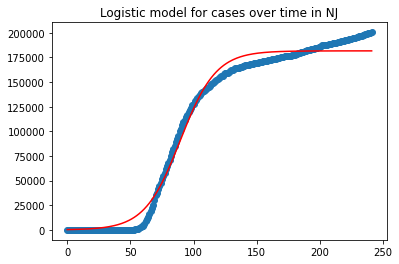

In [ ]:
#Created an array for the y and x values used for the logistic model
#Found the cases over time in New Jersey
ys = cases_over_time_in_state('NJ')
xs = np.arange(len(ys))

#fit_model contains the logistic_curve definition and find_betas
#find_betas returns beta0, beta1, and beta2 used for the logistic model
fit_model = lambda x: logistic_curve( x, find_betas('NJ')[0],find_betas('NJ')[1],find_betas('NJ')[2] )
#plot the cases over time versus the number of days 
plt.scatter( xs, ys )
#plot the logistic model 
plt.plot( xs, fit_model( xs ), color='red' )
plt.title('Logistic model for cases over time in NJ')
plt.show()

New Jersey data fits the logistic curve at around 70 to 110 days because of its slope of increase in cases.
The data does not fit the curve at 40 to 70 days because the cases do not increase as fast as the red curve does.
At 125 days, the data does not plateau as the model/red curve does since New Jersey's cases
continues to increase.

### Heatmap Between Variables

The heatmap is used to observe any correlations between a state's political leaning and the variables related to COVID.
Variables related to COVID that will be included are most number of cases, most recent number of cases per capita, projected maximum number of cases, projected maximum number of cases per capita,
rate of increase, and time of maximum increase

In [ ]:
#Created a new data frame that contains COVID cases and the betas for each state
df_betas_merged = pd.concat([df_merged,betas_df],axis=1)

#Created a new column that represents the cases per capita 
df_betas_merged['cases_per_capita'] = df_merged['9/22/20']/df_merged['population']
#Created a new column the represents the max cases per capita
df_betas_merged['max_cases_per_capita'] = betas_df['B0'] / df_merged['population']

heat_map_df = df_betas_merged.iloc[:,-8:]
heat_map_df.columns= ['9/22/20','Clinton', 'Trump','max_cases','rate_of_increase',\
                    'time_of_max_increase','cases_per_capita','max_cases_per_capita']
#Dropped the Trump column because we have included Clinton, 
#which can still allow us to see a state's political leaning
heat_map_df.drop('Trump', axis =1 , inplace = True)
#Dropped the ND row because curve_fit couldn't find values for this state's betas
heat_map_df.drop(['ND'], axis = 0, inplace = True)
heat_map_df.head()


,9/22/20,Clinton,max_cases,rate_of_increase,time_of_max_increase,cases_per_capita,max_cases_per_capita
State,,,,,,,
AK,6950,38,8715.252021,0.038377,206.937470,0.009500,0.011913
AL,146584,35,163696.458948,0.037565,186.151148,0.029896,0.033386
AR,76981,34,84118.050890,0.036137,188.644108,0.025509,0.027874
AZ,214846,45,211619.016188,0.061955,164.568472,0.029517,0.029074
CA,793250,62,900098.736795,0.036565,183.268211,0.020076,0.022780


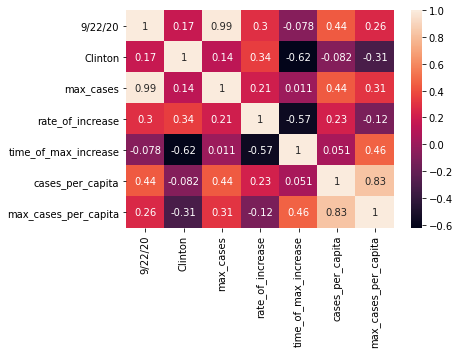

In [ ]:
#Corrcoef returns an array of the correlation coefficients between the different variables
correlation_coefficients = np.corrcoef(heat_map_df, rowvar=False )
#Create a heat map 
labels = heat_map_df.columns
ax = sns.heatmap(correlation_coefficients, xticklabels = labels, yticklabels = labels, annot=True)

Some interesting points were that there was a positive correlation 
between the percentage of the state that voted for Clinton and the most recent COVID cases (9/22). 
It can also be assumed that the most recent COVID cases and percentage that voted for Trump had a negative correlation then.
This was suprising but understandable as most states that voted for Clinton have concentrated
cities.

There was a positive correlation value of 0.3 between the recent cases and rate_of_increase as well as
a high correlation value between recent cases (9/22/20) and maximum cases of 0.99.
It was expected that the recent cases would be highly correlated with the projected maximum cases 
as COVID has been continuing to spread and infect more and more people, 


### Hypothesis Tests Between Variables

#### First Hypothesis Test

Looking at all of the correlations from the heatmaps, it would be interesting to conduct a hypothesis test 
between the percentage of votes that went to Hillary Clinton and the maximum time of COVID 
increase (beta 2). These two variables had a correlation value of -0.62, which was the largest 
value of the correlation values seen from the heatmap. The value represents a strong 
relationship between political leaning and the maximum time of COVID cases. 

Null hypothesis: mean maximum time increase is the same for democratic states and republican states

Alternative hypothesis: mean maximum time increase is **not** the same for democratic states and republican states


In [ ]:
import scipy.stats as stats
hypothesis_df = df_betas_merged.iloc[:,-8:]
hypothesis_df.columns= ['9/22/20','Clinton', 'Trump','max_cases','rate_of_increase',
                'time_of_max_increase','cases_per_capita','max_cases_per_capita']
#Created a dataframe that only contains states with a Clinton percentage higher than or equal to 50
clinton = hypothesis_df[hypothesis_df['Clinton'] >= 50].dropna()
#Created a dataframe that only contains states with a Trump percentage higher than or equal to 50
trump = hypothesis_df[hypothesis_df['Trump'] >= 50].dropna()

In [ ]:
#Define a definition that will conduct the hypothesis test
def compare_pop_means ( name1, name2, subpop1, subpop2, column, alpha=0.05):
    mean1 = subpop1[column].mean()
    mean2 = subpop2[column].mean()
    t_statistics, p_value = stats.ttest_ind(subpop1[column],subpop2[column],equal_var=False )
    reject_H0 = p_value < alpha
    print( f'Mean of {name1}: {mean1}' )
    print( f'Mean of {name2}: {mean2}' )
    print( f'Reject H_0 (populations seem different)? {reject_H0}' )
    return alpha, p_value, reject_H0

compare_pop_means( 'Clinton', 'Trump', clinton, trump, 'time_of_max_increase')

Mean of Clinton: 138.4075752834221
Mean of Trump: 200.19255585026818
Reject H_0 (populations seem different)? True


(0.05, 6.10065659056423e-05, True)

The p-value is small enough that we can easily reject the null hypothesis of the two 
means being equal. Red and blue states have statistically 
significantly different mean time of maximum increase in COVID cases.

#### Second Hypothesis Test

Looking at all of the correlations from the heatmaps, it would be interesting to conduct a hypothesis test 
between the percentage of votes that went to Hillary Clinton and the rate of increase (beta 1). 
These two variables had a correlation value of 0.34, which was the second-largest value compared 
to the other correlation values from Question 5. The value represents a weak relationship 
between political leaning and the rate of increase of COVID cases.

Null hypothesis: mean rate of increase in COVID cases is the same for democratic states and republican states

Alternative hypothesis: mean rate of increase in COVID cases is **not** the same for democratic states and republican states

In [ ]:
#Using the compare_pop_means definition, we are conducting a hypothesis test for the rate of increase
#between the demoratic and republican states 
compare_pop_means( 'Clinton', 'Trump', clinton, trump, 'rate_of_increase')

Mean of Clinton: 0.04405172135609702
Mean of Trump: 0.032872898214180706
Reject H_0 (populations seem different)? True


(0.05, 0.038610253998221815, True)

The p-value is small enough that we can easily reject the null hypothesis of the two 
means being equal. Red and blue states have statistically 
significantly different mean rate of increase in COVID cases.

#### Third Hypothesis Test

Looking at all of the correlations from the heatmaps, it would be interesting to conduct a hypothesis test 
between the percentage of votes that went to Hillary Clinton and the projected max cases per capita. 
These two variables had a correlation value of -0.31, which was the third-largest value 
compared to the other correlation values from Question 5. The value represents a weak 
relationship between political leaning and the projected max cases per capita of COVID cases.

Null hypothesis: mean projected max cases per capita of COVID cases is the same for democratic states and republican states

Alternative hypothesis: mean projected max cases per capita of COVID cases is **not** the same for democratic states and republican states

In [ ]:
#Using the compare_pop_means definition, we are conducting a hypothesis test for the mean projected 
#max cases per capita between the demoratic and republican states 
compare_pop_means( 'Clinton', 'Trump', clinton, trump, 'max_cases_per_capita')

Mean of Clinton: 0.016570081813589786
Mean of Trump: 0.02711075343589214
Reject H_0 (populations seem different)? True


(0.05, 0.00020105150102120732, True)

The p-value is small enough that we can easily reject the null hypothesis of the two 
means being equal. Red and blue states have statistically 
significantly different mean projected maximum cases per capita.

#### Fourth Hypothesis Test

Looking at all of the correlations from the heatmaps, it would be interesting to conduct a hypothesis test 
between the percentage of votes that went to Hillary Clinton and the max cases. 
These two variables had a correlation value of 0.17, which represents a very weak 
relationship between political leaning and the most recent cases of the dataset denoted by the date 9/22/20.

Null hypothesis: mean recent COVID cases is the same for democratic states and republican states

Alternative hypothesis: mean recent COVID cases is **not** the same for democratic states and republican states

In [ ]:
#Using the compare_pop_means definition, we are conducting a hypothesis test for the mean
#recent cases per capita between the demoratic and republican states 
compare_pop_means( 'Clinton', 'Trump', clinton, trump, '9/22/20')

Mean of Clinton: 157423.86666666667
Mean of Trump: 126737.29166666667
Reject H_0 (populations seem different)? False


(0.05, 0.6317377661003123, False)

The p-value is large enough that we cannot reject the null hypothesis of the two 
means being equal. Red and blue states do not have statistically 
significantly different mean recent cases.

#### Fifth Hypothesis Test

Looking at all of the correlations from the heatmaps, it would be interesting to conduct a hypothesis test 
between the percentage of votes that went to Hillary Clinton and the max cases. 
These two variables had a correlation value of 0.14, which represents a very weak 
relationship between political leaning and the max cases.

Null hypothesis: mean max COVID cases is the same for democratic states and republican states

Alternative hypothesis: mean max COVID cases is **not** the same for democratic states and republican states

In [ ]:
#Using the compare_pop_means definition, we are conducting a hypothesis test for the mean
#max cases between the demoratic and republican states 
compare_pop_means( 'Clinton', 'Trump', clinton, trump, 'max_cases')

Mean of Clinton: 161893.43827492822
Mean of Trump: 150969.4226427778
Reject H_0 (populations seem different)? False


(0.05, 0.8740787284670588, False)

The p-value is large enough that we cannot reject the null hypothesis of the two 
means being equal. Red and blue states do not have statistically 
significantly different mean maximum cases.

#### Sixth Hypothesis Test

Looking at all of the correlations from the heatmaps, it would be interesting to conduct a hypothesis test 
between the percentage of votes that went to Hillary Clinton and the max cases. 
These two variables had a correlation value of -0.082, which represents a very weak 
relationship between political leaning and the cases per capita.

Null hypothesis: mean cases per capita is the same for democratic states and republican states

Alternative hypothesis: mean cases per capita is **not** the same for democratic states and republican states

In [ ]:
#Using the compare_pop_means definition, we are conducting a hypothesis test for the mean
#cases per capita between the demoratic and republican states 
compare_pop_means( 'Clinton', 'Trump', clinton, trump, 'cases_per_capita')

Mean of Clinton: 0.01677699016607986
Mean of Trump: 0.021100676764582046
Reject H_0 (populations seem different)? False


(0.05, 0.06768668215360787, False)

The p-value is large enough that we cannot reject the null hypothesis of the two 
means being equal. Red and blue states do not have statistically 
significantly different mean cases per capita.

Through the hypothesis tests, the political affiliation of states do have a statistically significantly 
different means for the following variables: time of max increase, rate of increase, and 
max cases per capita. The political affiliation of states do not have a statistically significantly 
different means for the following variables: recent cases (9/22/20), max cases, and cases per capita.